          Date  Sales
0   2012-01-01  23.16
1   2012-02-01  22.95
2   2012-03-01  23.28
3   2012-04-01  24.06
4   2012-05-01  24.40
..         ...    ...
128 2022-09-01  47.00
129 2022-10-01  46.86
130 2022-11-01  45.48
131 2022-12-01  43.61
132 2023-01-01  41.33

[133 rows x 2 columns]


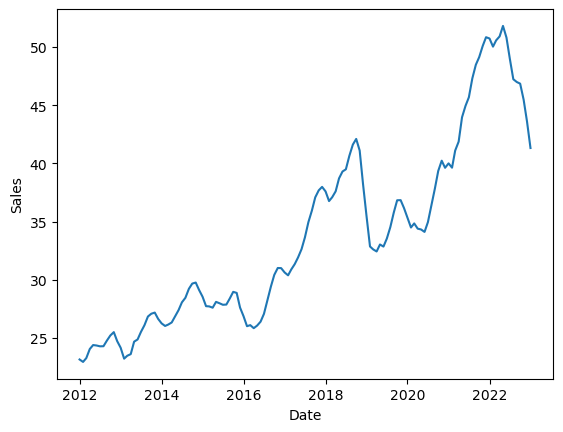

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the sales data into a pandas dataframe
df = pd.read_csv('semic1.csv', parse_dates=['Date'])
print(df)
# Create a line chart of the sales data
plt.plot(df['Date'], df['Sales'])

# Set the x-axis label to 'Date' and the y-axis label to 'Sales'
plt.xlabel('Date')
plt.ylabel('Sales')

# Show the chart
plt.show()


In [2]:
df.describe()

,Sales
count,133.000000
mean,33.781128
std,8.021424
min,22.950000
25%,27.080000
50%,32.620000
75%,39.310000
max,51.820000


In [3]:
df=pd.read_csv("semic1.csv")
df

,Date,Sales
0,1/1/2012,23.16
1,2/1/2012,22.95
2,3/1/2012,23.28
3,4/1/2012,24.06
4,5/1/2012,24.40
...,...,...
128,9/1/2022,47.00
129,10/1/2022,46.86
130,11/1/2022,45.48
131,12/1/2022,43.61


In [ ]:
pip install -U scikit-learn

In [4]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

import datetime





from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor



import statsmodels.tsa.api as smt
import statsmodels.api as sm
from statsmodels.tools.eval_measures import rmse



In [5]:








def get_diff(data):
    """Returns the dataframe with a column for sales difference between each
    month. Results in a stationary time series dataframe. Prior EDA revealed
    that the monthly data was not stationary as it had a time-dependent mean.
    """
    data['sales_diff'] = data.Sales.diff()
    data = data.dropna()
    print(data)
    data.to_csv('stationary_df.csv')

    return data


def generate_supervised(data):
    """Generates a csv file where each row represents a month and columns
    include sales, the dependent variable, and prior sales for each lag. Based
    on EDA, 12 lag features are generated. Data is used for regression modeling.
    Output df:
    month1  sales  lag1  lag2  lag3 ... lag11 lag12
    month2  sales  lag1  lag2  lag3 ... lag11 lag12
    """
    supervised_df = data.copy()

    #create column for each lag
    for i in range(1, 13):
        col_name = 'lag_' + str(i)
        supervised_df[col_name] = supervised_df['sales_diff'].shift(i)
    
    
    #drop null values
    supervised_df = supervised_df.dropna().reset_index(drop=True)

    supervised_df.to_csv('model_df.csv', index=False)




data=pd.read_csv('semic1.csv')
print(data)
stationary_df = get_diff(data)
stationary_df
generate_supervised(stationary_df)

data1=pd.read_csv('model_df.csv')
stationary_df

          Date  Sales
0     1/1/2012  23.16
1     2/1/2012  22.95
2     3/1/2012  23.28
3     4/1/2012  24.06
4     5/1/2012  24.40
..         ...    ...
128   9/1/2022  47.00
129  10/1/2022  46.86
130  11/1/2022  45.48
131  12/1/2022  43.61
132   1/1/2023  41.33

[133 rows x 2 columns]
          Date  Sales  sales_diff
1     2/1/2012  22.95       -0.21
2     3/1/2012  23.28        0.33
3     4/1/2012  24.06        0.78
4     5/1/2012  24.40        0.34
5     6/1/2012  24.36       -0.04
..         ...    ...         ...
128   9/1/2022  47.00       -0.24
129  10/1/2022  46.86       -0.14
130  11/1/2022  45.48       -1.38
131  12/1/2022  43.61       -1.87
132   1/1/2023  41.33       -2.28

[132 rows x 3 columns]


,Date,Sales,sales_diff
1,2/1/2012,22.95,-0.21
2,3/1/2012,23.28,0.33
3,4/1/2012,24.06,0.78
4,5/1/2012,24.40,0.34
5,6/1/2012,24.36,-0.04
...,...,...,...
128,9/1/2022,47.00,-0.24
129,10/1/2022,46.86,-0.14
130,11/1/2022,45.48,-1.38
131,12/1/2022,43.61,-1.87


          Date  Sales
0   2012-01-01  23.16
1   2012-02-01  22.95
2   2012-03-01  23.28
3   2012-04-01  24.06
4   2012-05-01  24.40
..         ...    ...
128 2022-09-01  47.00
129 2022-10-01  46.86
130 2022-11-01  45.48
131 2022-12-01  43.61
132 2023-01-01  41.33

[133 rows x 2 columns]


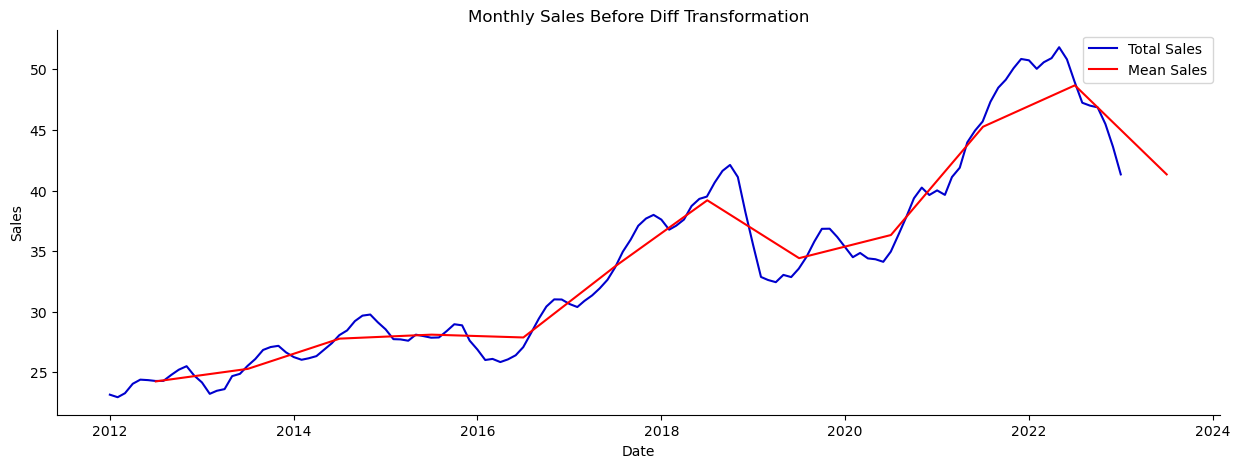

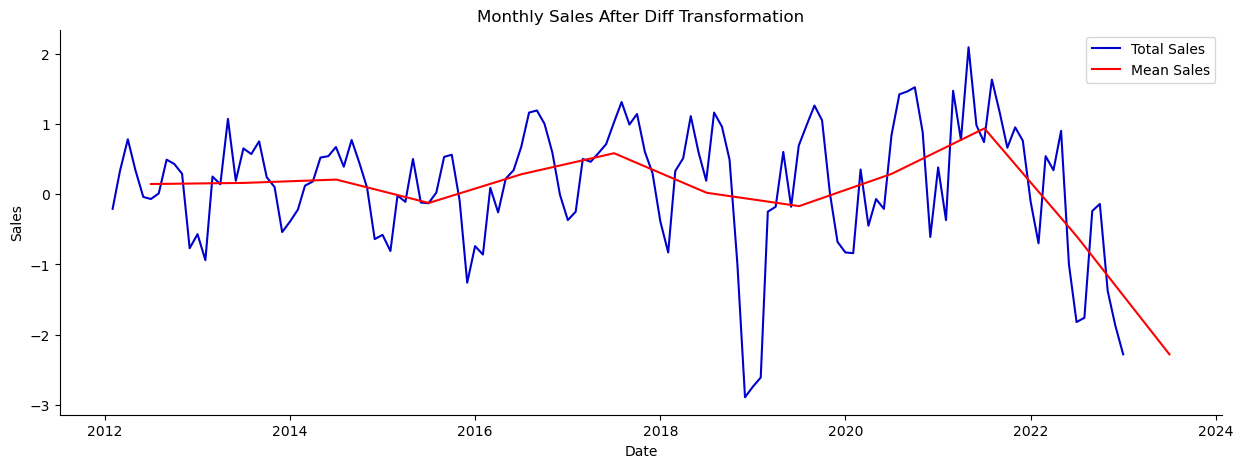

In [6]:
import datetime
def time_plot(data, x_col, y_col, title):
    fig, ax = plt.subplots(figsize=(15,5))
    sns.lineplot(x=x_col, y=y_col, data=data, ax=ax, color='mediumblue', label='Total Sales')
    
    second = data.groupby(data.Date.dt.year)[y_col].mean().reset_index()
    
    second.Date = pd.to_datetime(second.Date, format='%Y')
    sns.lineplot(x=(second.Date + datetime.timedelta(6*365/12)), y=y_col, data=second, ax=ax, color='red', label='Mean Sales')   
    
    ax.set(xlabel = "Date",
           ylabel = "Sales",
           title = title)
    
    sns.despine()
data=pd.read_csv('semic1.csv')

data['Date'] = pd.to_datetime(data['Date'])
print(data)
time_plot(data,'Date', 'Sales', 'Monthly Sales Before Diff Transformation')
stationary_df['Date'] = pd.to_datetime(stationary_df['Date'])
time_plot(stationary_df, 'Date', 'sales_diff', 'Monthly Sales After Diff Transformation')

            sales_diff
Date                  
2012-02-01       -0.21
2012-03-01        0.33
2012-04-01        0.78
2012-05-01        0.34
2012-06-01       -0.04
...                ...
2022-09-01       -0.24
2022-10-01       -0.14
2022-11-01       -1.38
2022-12-01       -1.87
2023-01-01       -2.28

[132 rows x 1 columns]


C:\Users\bishsah\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


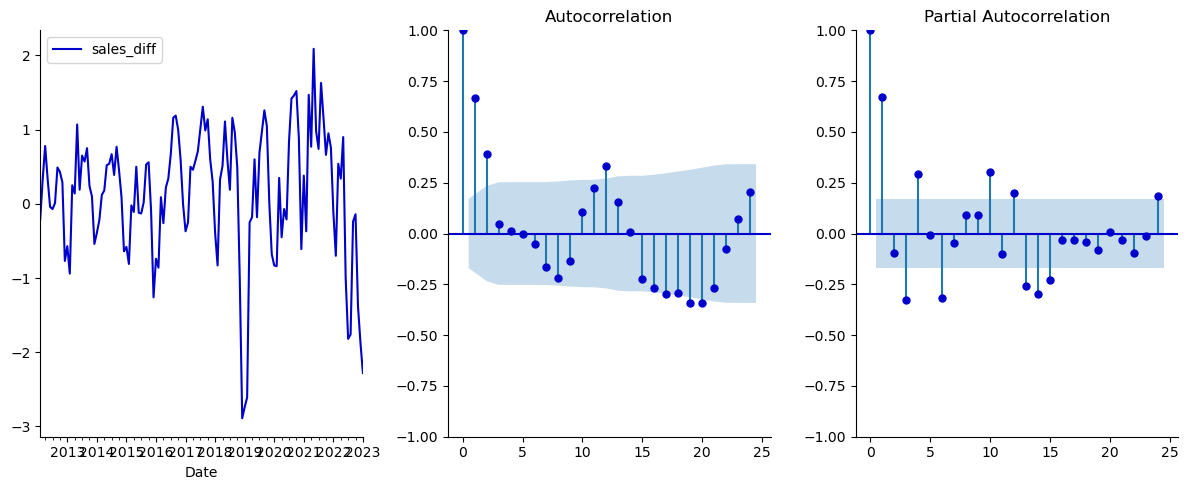

In [7]:
def plots(data, lags=None):
    
    # Convert dataframe to datetime index
    dt_data = data.set_index('Date').drop('Sales', axis=1)
    print(dt_data)
    dt_data.dropna(axis=0)
    
    layout = (1, 3)
    raw  = plt.subplot2grid(layout, (0, 0))
    acf  = plt.subplot2grid(layout, (0, 1))
    pacf = plt.subplot2grid(layout, (0, 2))
    
    dt_data.plot(ax=raw, figsize=(12, 5), color='mediumblue')
    smt.graphics.plot_acf(dt_data, lags=lags, ax=acf, color='mediumblue')
    smt.graphics.plot_pacf(dt_data, lags=lags, ax=pacf, color='mediumblue')
    sns.despine()
    plt.tight_layout()

plots(stationary_df, lags=24);

In [8]:
model_df = pd.read_csv('model_df.csv')
model_df

,Date,Sales,sales_diff,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12
0,2/1/2013,23.23,-0.94,-0.57,-0.77,0.29,0.43,0.49,0.01,-0.07,-0.04,0.34,0.78,0.33,-0.21
1,3/1/2013,23.48,0.25,-0.94,-0.57,-0.77,0.29,0.43,0.49,0.01,-0.07,-0.04,0.34,0.78,0.33
2,4/1/2013,23.62,0.14,0.25,-0.94,-0.57,-0.77,0.29,0.43,0.49,0.01,-0.07,-0.04,0.34,0.78
3,5/1/2013,24.69,1.07,0.14,0.25,-0.94,-0.57,-0.77,0.29,0.43,0.49,0.01,-0.07,-0.04,0.34
4,6/1/2013,24.88,0.19,1.07,0.14,0.25,-0.94,-0.57,-0.77,0.29,0.43,0.49,0.01,-0.07,-0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,9/1/2022,47.00,-0.24,-1.76,-1.82,-1.00,0.90,0.34,0.54,-0.70,-0.11,0.76,0.95,0.66,1.16
116,10/1/2022,46.86,-0.14,-0.24,-1.76,-1.82,-1.00,0.90,0.34,0.54,-0.70,-0.11,0.76,0.95,0.66
117,11/1/2022,45.48,-1.38,-0.14,-0.24,-1.76,-1.82,-1.00,0.90,0.34,0.54,-0.70,-0.11,0.76,0.95
118,12/1/2022,43.61,-1.87,-1.38,-0.14,-0.24,-1.76,-1.82,-1.00,0.90,0.34,0.54,-0.70,-0.11,0.76


In [9]:
def tts(data):
    data = data.drop(['Sales','Date'],axis=1)
    train, test = data[0:-36].values, data[-36:].values
    
    return train, test

train, test = tts(model_df)
print(train,test)

[[-0.94 -0.57 -0.77 ...  0.78  0.33 -0.21]
 [ 0.25 -0.94 -0.57 ...  0.34  0.78  0.33]
 [ 0.14  0.25 -0.94 ... -0.04  0.34  0.78]
 ...
 [ 0.01  1.05  1.26 ... -2.74 -2.89 -1.  ]
 [-0.68  0.01  1.05 ... -2.61 -2.74 -2.89]
 [-0.83 -0.68  0.01 ... -0.25 -2.61 -2.74]] [[-0.84 -0.83 -0.68  0.01  1.05  1.26  0.98  0.69 -0.18  0.6  -0.18 -0.25
  -2.61]
 [ 0.35 -0.84 -0.83 -0.68  0.01  1.05  1.26  0.98  0.69 -0.18  0.6  -0.18
  -0.25]
 [-0.45  0.35 -0.84 -0.83 -0.68  0.01  1.05  1.26  0.98  0.69 -0.18  0.6
  -0.18]
 [-0.07 -0.45  0.35 -0.84 -0.83 -0.68  0.01  1.05  1.26  0.98  0.69 -0.18
   0.6 ]
 [-0.21 -0.07 -0.45  0.35 -0.84 -0.83 -0.68  0.01  1.05  1.26  0.98  0.69
  -0.18]
 [ 0.84 -0.21 -0.07 -0.45  0.35 -0.84 -0.83 -0.68  0.01  1.05  1.26  0.98
   0.69]
 [ 1.42  0.84 -0.21 -0.07 -0.45  0.35 -0.84 -0.83 -0.68  0.01  1.05  1.26
   0.98]
 [ 1.46  1.42  0.84 -0.21 -0.07 -0.45  0.35 -0.84 -0.83 -0.68  0.01  1.05
   1.26]
 [ 1.52  1.46  1.42  0.84 -0.21 -0.07 -0.45  0.35 -0.84 -0.83 -0.68  0.01

In [10]:
print(train.shape,test.shape)



(84, 13) (36, 13)


In [11]:
def scale_data(train_set, test_set):
    #apply Min Max Scaler
    scaler = MinMaxScaler(feature_range=(-1, 1))
    scaler = scaler.fit(train_set)
    
    # reshape training set
    train_set = train_set.reshape(train_set.shape[0], train_set.shape[1])
    train_set_scaled = scaler.transform(train_set)
    print(train_set_scaled,train_set_scaled.shape)
    # reshape test set
    test_set = test_set.reshape(test_set.shape[0], test_set.shape[1])
    test_set_scaled = scaler.transform(test_set)
    
    X_train, y_train = train_set_scaled[:, 1:], train_set_scaled[:, 0:1].ravel()
    X_test, y_test = test_set_scaled[:, 1:], test_set_scaled[:, 0:1].ravel()
    
    return X_train, y_train, X_test, y_test, scaler

X_train, y_train, X_test, y_test, scaler_object = scale_data(train, test)
print(X_train,X_train.shape,y_train, y_train.shape,X_test, X_test.shape, y_test,y_test.shape, scaler_object)

[[-0.07142857  0.1047619   0.00952381 ...  0.74761905  0.53333333
   0.27619048]
 [ 0.4952381  -0.07142857  0.1047619  ...  0.53809524  0.74761905
   0.53333333]
 [ 0.44285714  0.4952381  -0.07142857 ...  0.35714286  0.53809524
   0.74761905]
 ...
 [ 0.38095238  0.87619048  0.97619048 ... -0.92857143 -1.
  -0.1       ]
 [ 0.05238095  0.38095238  0.87619048 ... -0.86666667 -0.92857143
  -1.        ]
 [-0.01904762  0.05238095  0.38095238 ...  0.25714286 -0.86666667
  -0.92857143]] (84, 13)
[[ 0.1047619   0.00952381  0.51428571 ...  0.74761905  0.53333333
   0.27619048]
 [-0.07142857  0.1047619   0.00952381 ...  0.53809524  0.74761905
   0.53333333]
 [ 0.4952381  -0.07142857  0.1047619  ...  0.35714286  0.53809524
   0.74761905]
 ...
 [ 0.87619048  0.97619048  0.84285714 ... -0.92857143 -1.
  -0.1       ]
 [ 0.38095238  0.87619048  0.97619048 ... -0.86666667 -0.92857143
  -1.        ]
 [ 0.05238095  0.38095238  0.87619048 ...  0.25714286 -0.86666667
  -0.92857143]] (84, 12) [-0.07142857  

In [12]:
y_train.shape

(84,)

In [13]:
def undo_scaling(y_pred, x_test, scaler_obj):  
    #reshape y_pred
    y_pred = y_pred.reshape(y_pred.shape[0], 1, 1)
    
    
    x_test = x_test.reshape(x_test.shape[0], 1, x_test.shape[1])
    
    #rebuild test set for inverse transform
    pred_test_set = []
    for index in range(0,len(y_pred)):
        pred_test_set.append(np.concatenate([y_pred[index],x_test[index]],axis=1))
        
    #reshape pred_test_set
    pred_test_set = np.array(pred_test_set)
    pred_test_set = pred_test_set.reshape(pred_test_set.shape[0], pred_test_set.shape[2])
    
    #inverse transform
    pred_test_set_inverted = scaler_obj.inverse_transform(pred_test_set)
    
    return pred_test_set_inverted

In [14]:


def load_original_df():
    #load in original dataframe without scaling applied
    original_df = pd.read_csv('semic1.csv')
    
    original_df.Date = pd.to_datetime(original_df.Date)
    
    return original_df

In [15]:
def predict_df(unscaled_predictions, original_df):
    #create dataframe that shows the predicted sales
    result_list = []
    
    sales_dates = list(original_df[-37:].Date)
    act_sales = list(original_df[-37:].Sales)
    
    for index in range(0,len(unscaled_predictions)):
        result_dict = {}
        result_dict['pred_value'] = int(unscaled_predictions[index][0] + act_sales[index])
        result_dict['Date'] = sales_dates[index+1]
        result_list.append(result_dict)
        
    df_result = pd.DataFrame(result_list)
    
    return df_result


In [16]:
model_scores = {}

def get_scores(unscaled_df, original_df, model_name):
    rmse = np.sqrt(mean_squared_error(original_df.Sales[-36:], unscaled_df.pred_value[-36:]))
    mae = mean_absolute_error(original_df.Sales[-36:], unscaled_df.pred_value[-36:])
    r2 = r2_score(original_df.Sales[-36:], unscaled_df.pred_value[-36:])
    model_scores[model_name] = [rmse, mae, r2]

    print(f"RMSE: {rmse}")
    print(f"MAE: {mae}")
    print(f"R2 Score: {r2}")

In [17]:
def plot_results(results, original_df, model_name):

    fig, ax = plt.subplots(figsize=(15,5))
    sns.lineplot(x=original_df.Date, y=original_df.Sales, data=original_df, ax=ax, 
                 label='Original', color='mediumblue')
    sns.lineplot(x=results.Date, y=results.pred_value, data=results, ax=ax, 
                 label='Predicted', color='Red')
    
    ax.set(xlabel = "Date",
           ylabel = "Sales",
           title = f"{model_name} Sales Forecasting Prediction")
    
    ax.legend()
    
    sns.despine()
    
    plt.savefig(f'{model_name}_forecast.png')

In [18]:
def run_model(train_data, test_data, model, model_name):
    
    X_train, y_train, X_test, y_test, scaler_object = scale_data(train_data, test_data)
    
    mod = model
    mod.fit(X_train, y_train)
    predictions = mod.predict(X_test)
    
    # Undo scaling to compare predictions against original data
    original_df = load_original_df()
    
    unscaled = undo_scaling(predictions, X_test, scaler_object)
    
    unscaled_df = predict_df(unscaled, original_df)
     
    get_scores(unscaled_df, original_df, model_name)
    
    plot_results(unscaled_df, original_df, model_name)

[[-0.07142857  0.1047619   0.00952381 ...  0.74761905  0.53333333
   0.27619048]
 [ 0.4952381  -0.07142857  0.1047619  ...  0.53809524  0.74761905
   0.53333333]
 [ 0.44285714  0.4952381  -0.07142857 ...  0.35714286  0.53809524
   0.74761905]
 ...
 [ 0.38095238  0.87619048  0.97619048 ... -0.92857143 -1.
  -0.1       ]
 [ 0.05238095  0.38095238  0.87619048 ... -0.86666667 -0.92857143
  -1.        ]
 [-0.01904762  0.05238095  0.38095238 ...  0.25714286 -0.86666667
  -0.92857143]] (84, 13)
RMSE: 1.0519241628769844
MAE: 0.8705555555555556
R2 Score: 0.9673375534092857


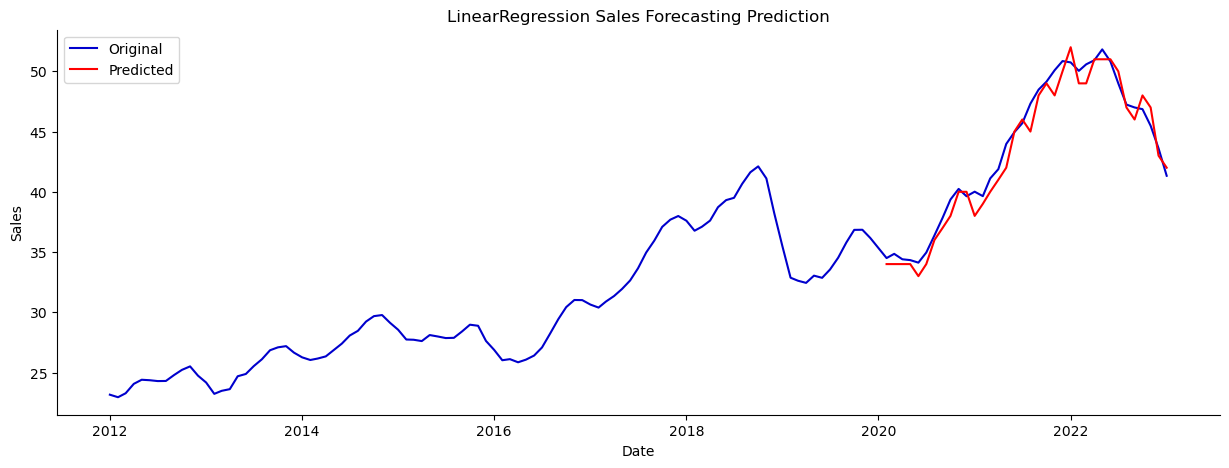

In [19]:
#Linear Regression

run_model(train, test, LinearRegression(), 'LinearRegression')

[[-0.07142857  0.1047619   0.00952381 ...  0.74761905  0.53333333
   0.27619048]
 [ 0.4952381  -0.07142857  0.1047619  ...  0.53809524  0.74761905
   0.53333333]
 [ 0.44285714  0.4952381  -0.07142857 ...  0.35714286  0.53809524
   0.74761905]
 ...
 [ 0.38095238  0.87619048  0.97619048 ... -0.92857143 -1.
  -0.1       ]
 [ 0.05238095  0.38095238  0.87619048 ... -0.86666667 -0.92857143
  -1.        ]
 [-0.01904762  0.05238095  0.38095238 ...  0.25714286 -0.86666667
  -0.92857143]] (84, 13)
RMSE: 1.0854543339593388
MAE: 0.9000000000000001
R2 Score: 0.9652221312189825


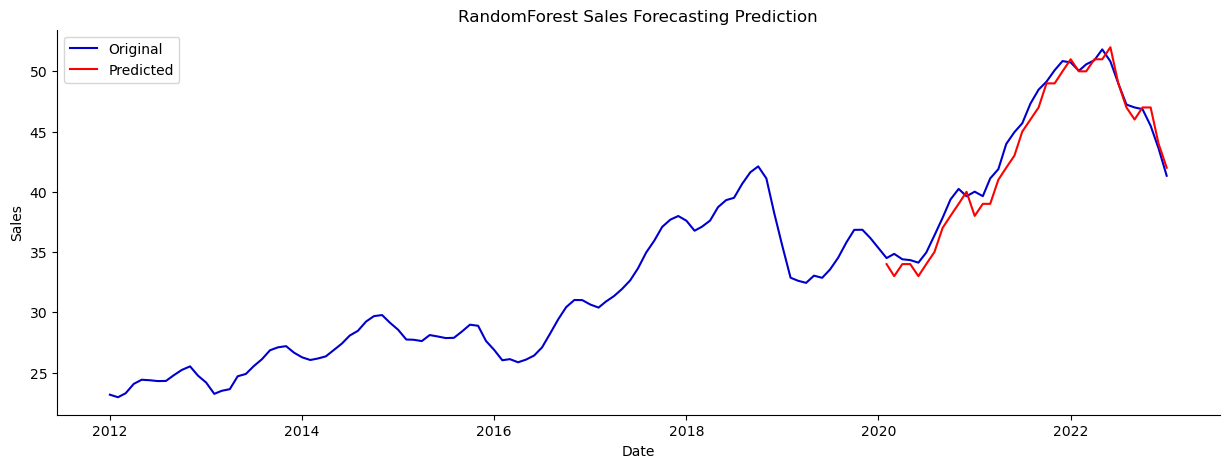

In [20]:
#Random Forest Regressor
run_model(train, test, RandomForestRegressor(n_estimators=100, max_depth=20),'RandomForest')

[[-0.07142857  0.1047619   0.00952381 ...  0.74761905  0.53333333
   0.27619048]
 [ 0.4952381  -0.07142857  0.1047619  ...  0.53809524  0.74761905
   0.53333333]
 [ 0.44285714  0.4952381  -0.07142857 ...  0.35714286  0.53809524
   0.74761905]
 ...
 [ 0.38095238  0.87619048  0.97619048 ... -0.92857143 -1.
  -0.1       ]
 [ 0.05238095  0.38095238  0.87619048 ... -0.86666667 -0.92857143
  -1.        ]
 [-0.01904762  0.05238095  0.38095238 ...  0.25714286 -0.86666667
  -0.92857143]] (84, 13)
RMSE: 1.009339718165627
MAE: 0.8783333333333334
R2 Score: 0.9699285356268664


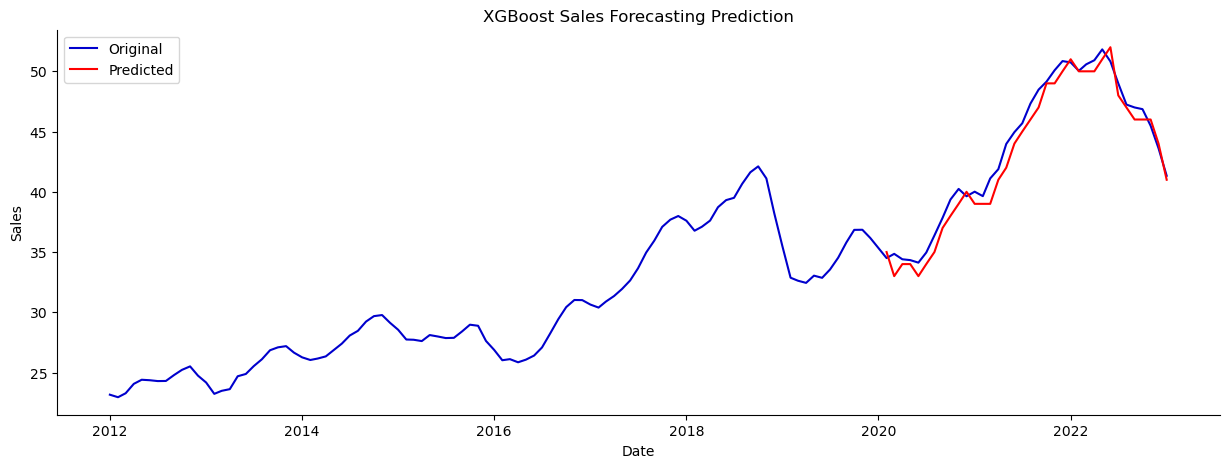

In [21]:
#XGBoost
run_model(train, test, XGBRegressor( n_estimators=400, 
                                    learning_rate=0.2, 
                                    objective='reg:squarederror'), 'XGBoost')

[[-0.07142857  0.1047619   0.00952381 ...  0.74761905  0.53333333
   0.27619048]
 [ 0.4952381  -0.07142857  0.1047619  ...  0.53809524  0.74761905
   0.53333333]
 [ 0.44285714  0.4952381  -0.07142857 ...  0.35714286  0.53809524
   0.74761905]
 ...
 [ 0.38095238  0.87619048  0.97619048 ... -0.92857143 -1.
  -0.1       ]
 [ 0.05238095  0.38095238  0.87619048 ... -0.86666667 -0.92857143
  -1.        ]
 [-0.01904762  0.05238095  0.38095238 ...  0.25714286 -0.86666667
  -0.92857143]] (84, 13)
RMSE: 1.1627983488120375
MAE: 0.9711111111111114
R2 Score: 0.9600893626487119


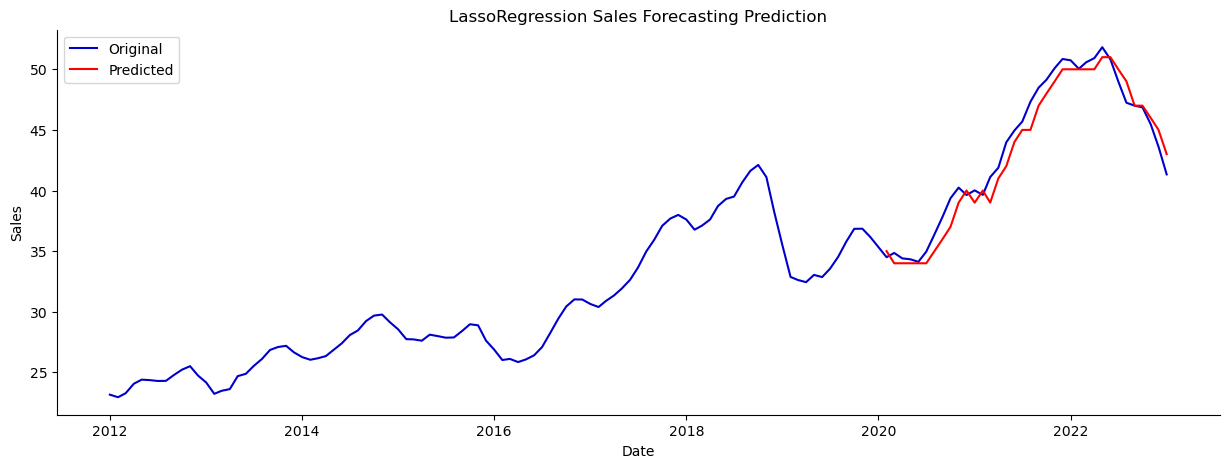

In [22]:
from sklearn.linear_model import Lasso

run_model(train, test,Lasso(alpha = 0.5), 'LassoRegression')

[[-0.07142857  0.1047619   0.00952381 ...  0.74761905  0.53333333
   0.27619048]
 [ 0.4952381  -0.07142857  0.1047619  ...  0.53809524  0.74761905
   0.53333333]
 [ 0.44285714  0.4952381  -0.07142857 ...  0.35714286  0.53809524
   0.74761905]
 ...
 [ 0.38095238  0.87619048  0.97619048 ... -0.92857143 -1.
  -0.1       ]
 [ 0.05238095  0.38095238  0.87619048 ... -0.86666667 -0.92857143
  -1.        ]
 [-0.01904762  0.05238095  0.38095238 ...  0.25714286 -0.86666667
  -0.92857143]] (84, 13)
RMSE: 0.9448045065279675
MAE: 0.7872222222222223
R2 Score: 0.9736510227369348


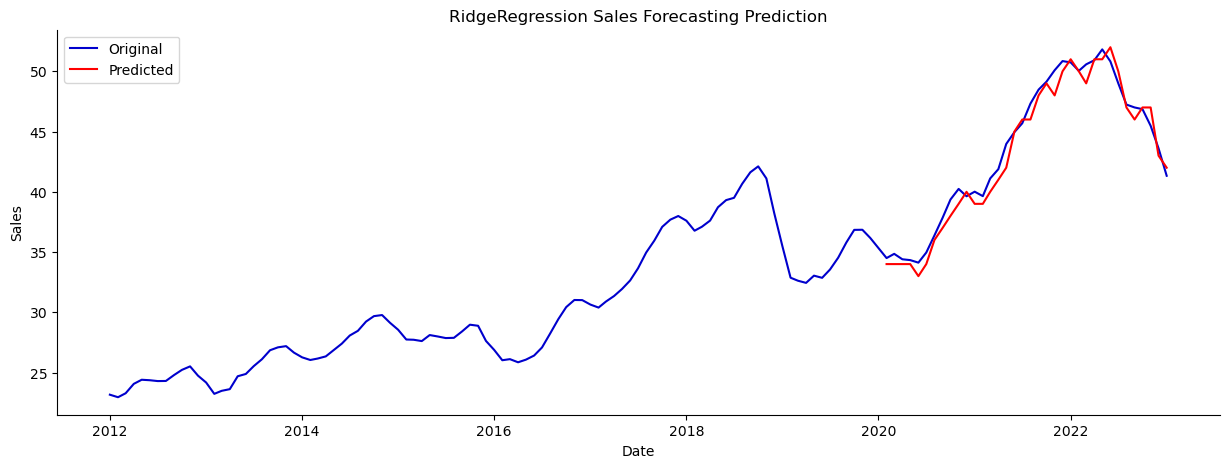

In [23]:
# implementing RIDGE regression
from sklearn.linear_model import Ridge
run_model(train, test,Ridge(alpha = 0.5), 'RidgeRegression')

In [24]:
results_dict = model_scores
    
    
    
restults_df = pd.DataFrame.from_dict(results_dict, orient='index', 
                                        columns=['RMSE', 'MAE','R2'])
    
restults_df = restults_df.sort_values(by='RMSE', ascending=False).reset_index()
    
restults_df


,index,RMSE,MAE,R2
0,LassoRegression,1.162798,0.971111,0.960089
1,RandomForest,1.085454,0.900000,0.965222
2,LinearRegression,1.051924,0.870556,0.967338
3,XGBoost,1.009340,0.878333,0.969929
4,RidgeRegression,0.944805,0.787222,0.973651


In [26]:
def plot_results1(results_df):
    fig, ax = plt.subplots(figsize=(12, 5))
    sns.lineplot(x=np.arange(len(results_df)), y='RMSE', data=results_df, ax=ax, 
                 label='RMSE', color='mediumblue')
    sns.lineplot(x=np.arange(len(results_df)), y='MAE', data=results_df, ax=ax, 
                 label='MAE', color='Cyan')
    
    plt.xticks(np.arange(len(results_df)),rotation=45)
    ax.set_xticklabels(results_df['index'])
    ax.set(xlabel = "Model",
           ylabel = "Scores",
           title = "Model Error Comparison")
    sns.despine()
    
    plt.savefig(f'compare_models.png')

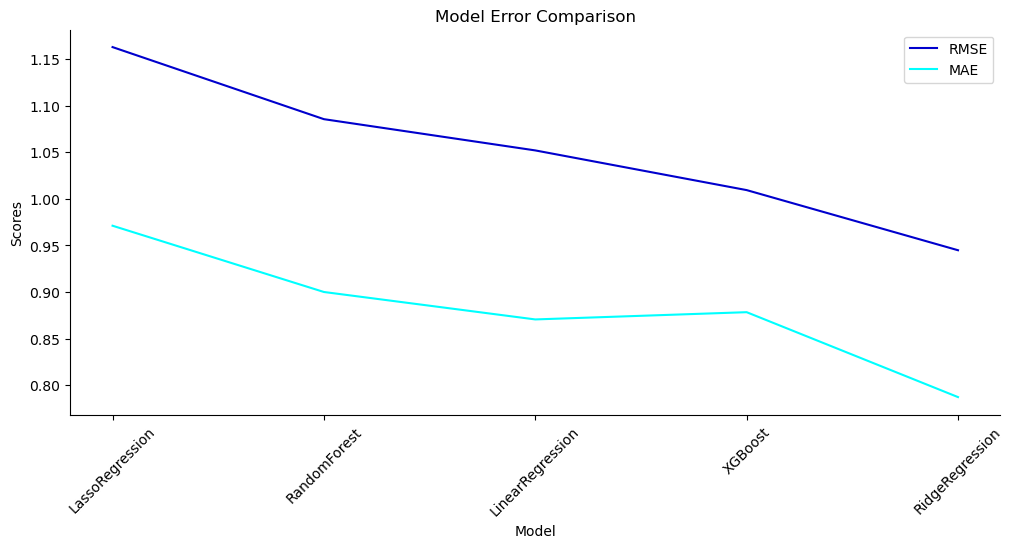

In [27]:
plot_results1(restults_df)


In [320]:
from sklearn.model_selection import KFold, cross_validate
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd

# Load the data
data = pd.read_csv('semic1.csv')

# Split the data into features and target
X = data.drop('Date', axis=1)
y = data['Sales']

# Create a list of regression models to evaluate
models = [('RidgeRegression', Ridge(alpha = 0.5)), ('LinearRegression', LinearRegression()), ('RandomForest', RandomForestRegressor(n_estimators=100, max_depth=20)),('XGB',XGBRegressor( n_estimators=400, learning_rate=0.2,objective='reg:squarederror')),('Lasso',Lasso(alpha = 0.5))]

# Define the number of folds for cross-validation
num_folds = 5

# Define the evaluation metrics
scoring = {'rmse': make_scorer(mean_squared_error, squared=False), 'mae': make_scorer(mean_absolute_error), 'r2': make_scorer(r2_score)}

# Evaluate each model using cross-validation
for model_name, model in models:
    kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)
    results = cross_validate(model, X, y, cv=kfold, scoring=scoring)
    rmse_scores = np.abs(results['test_rmse'])
    mae_scores = np.abs(results['test_mae'])
    r2_scores = results['test_r2']
    print(f'{model_name}: RMSE: {np.mean(rmse_scores):.3f} ({np.std(rmse_scores):.3f}) | MAE: {np.mean(mae_scores):.3f} ({np.std(mae_scores):.3f}) | R2: {np.mean(r2_scores):.3f} ({np.std(r2_scores):.3f})')


RidgeRegression: RMSE: 0.001 (0.000) | MAE: 0.001 (0.000) | R2: 1.000 (0.000)
LinearRegression: RMSE: 0.000 (0.000) | MAE: 0.000 (0.000) | R2: 1.000 (0.000)
RandomForest: RMSE: 0.209 (0.086) | MAE: 0.128 (0.045) | R2: 0.999 (0.001)
XGB: RMSE: 0.276 (0.103) | MAE: 0.170 (0.053) | R2: 0.998 (0.002)
Lasso: RMSE: 0.063 (0.011) | MAE: 0.053 (0.011) | R2: 1.000 (0.000)
